In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from numpy import nan as NaN
import matplotlib.dates as mdates
from typing import List, Union

In [2]:
filenames = []
__BASE__FILENAME__ = "dataset\\final_tweets_"
for i in range(1, 75):
    file = __BASE__FILENAME__ + str(i) + '.csv'
    filenames.append(file)
main_df = pd.DataFrame()
for filename in filenames:
    temp_df = pd.read_csv(filename)
    main_df = main_df.append(temp_df)

In [3]:
main_df

,Unnamed: 0,id_str,user_id,text,created_at,entities,lang,time_zone,user_location,location,entities_hashtags,entities_symbols,coordinates
0,0,1242693402971406342,1211110380249858049,CORONA 19 UPDATE \n---------------------------...,2020-03-25 06:02:50,"{'hashtags': [], 'symbols': [], 'user_mentions...",en,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1242693578817597442,2558507150,Anti Corona T-shirt collection is online for s...,2020-03-25 06:03:31,"{'hashtags': [{'text': '21daysLockdown', 'indi...",en,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1242693609725575168,1242691555628060672,The matter is serious. Take full care not to b...,2020-03-25 06:03:39,"{'hashtags': [], 'symbols': [], 'user_mentions...",en,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1242693680143544325,787255787961872388,All Mosque committee members headed by Syed Ga...,2020-03-25 06:03:56,"{'hashtags': [{'text': 'Narayanpet', 'indices'...",en,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1242693745755262977,1230923356519555072,@aajtak If these Indians are already infected ...,2020-03-25 06:04:11,"{'hashtags': [], 'symbols': [], 'user_mentions...",en,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,282,1264242054101635073,2987548622,#AatmaNirbharApnaBharat\nFacilitating states d...,2020-05-23 17:09:28,NaN,en,NaN,NaN,"लखनऊ, भारत","[{'text': 'AatmaNirbharApnaBharat', 'indices':...",[],NaN
283,283,1264242097940336641,2269187558,Cheers to you jyoti. Wish you health &amp; hap...,2020-05-23 17:09:39,NaN,en,NaN,NaN,"Bengaluru South, India","[{'text': 'PMCaresFund', 'indices': [125, 137]}]",[],NaN
284,284,1264242258762764289,2987548622,#AatmaNirbharApnaBharat\nTechnology driven edu...,2020-05-23 17:10:17,NaN,en,NaN,NaN,"लखनऊ, भारत","[{'text': 'AatmaNirbharApnaBharat', 'indices':...",[],NaN
285,285,1264242273790787584,1083235498418733057,#EidMubarak #EidAlFitr #RomanReigns @WWERomanR...,2020-05-23 17:10:21,NaN,en,NaN,NaN,India,"[{'text': 'EidMubarak', 'indices': [0, 11]}, {...",[],NaN


In [5]:
main_df.shape

(58491, 13)

In [7]:
reqd_data = [main_df['created_at'], main_df['entities_hashtags']]
print(type(reqd_data))
headers = ["created_at", "entities_hashtags"]
reqd_df = pd.concat(reqd_data, axis = 1, keys=headers)
reqd_df = reqd_df.dropna()
reqd_df

<class 'list'>


,created_at,entities_hashtags
0,2020-03-27 04:00:28,[]
1,2020-03-27 04:01:08,[]
2,2020-03-27 04:01:13,[]
3,2020-03-27 04:01:54,[]
4,2020-03-27 04:01:59,"[{'text': 'IndiaFightsCorona', 'indices': [215..."
...,...,...
282,2020-05-23 17:09:28,"[{'text': 'AatmaNirbharApnaBharat', 'indices':..."
283,2020-05-23 17:09:39,"[{'text': 'PMCaresFund', 'indices': [125, 137]}]"
284,2020-05-23 17:10:17,"[{'text': 'AatmaNirbharApnaBharat', 'indices':..."
285,2020-05-23 17:10:21,"[{'text': 'EidMubarak', 'indices': [0, 11]}, {..."


In [8]:
reqd_df.shape

(54029, 2)

In [9]:
columns = {"date", "time", "hashtags"}
split_df = pd.DataFrame(columns=columns)
split_df

,time,hashtags,date


In [12]:
# columns = {"date", "time", "hashtags"}
# split_df = pd.DataFrame(columns=columns)
# split_df
# error_rows = []
# temp = 0
# for idx, row in reqd_df.iterrows():
# #     print('Processing row '+ str(idx))
#     text_values = []
#     date, time = str(row.created_at).split()
#     try:
#         json_hashtags = json.loads(str(row.entities_hashtags).replace("'", '"'))
# #         for value in json_hashtags["hashtags"]:
#         text_values.append(json_hashtags["text"].lower())
#         if len(text_values) != 0:
#             temp_dict = {'date': date, 'hashtags': text_values, 'time': time}
#         else:
#             temp_dict = {'date': date, 'hashtags': NaN, 'time': time}
#         split_df = split_df.append(temp_dict, ignore_index=True)
#     except Exception as e:
#         print(e)
# #         print("error occurred while processing row " + str(idx))
#         error_rows.append(idx)

In [31]:
columns = {"date", "time", "hashtags"}
split_df = pd.DataFrame(columns=columns)
split_df
error_rows = []
temp = 0
i = 0
for idx, row in reqd_df.iterrows():
    if i%500 == 0:
        print('Processing row '+ str(i))
    text_values = []
    date, time = str(row.created_at).split()
    try:
        hashtags = json.loads(str(row.entities_hashtags).replace("'", '"'))
        for hashtag in hashtags:
            text_values.append(hashtag["text"].lower())
        if len(text_values) != 0:
            temp_dict = {'date': date, 'hashtags': text_values, 'time': time}
        else:
            temp_dict = {'date': date, 'hashtags': NaN, 'time': time}
        split_df = split_df.append(temp_dict, ignore_index=True)
    except Exception as e:
        print(e)
#         print("error occurred while processing row " + str(idx))
        error_rows.append(idx)
    i += 1

Processing row 0
Processing row 500
Processing row 1000
Processing row 1500
Processing row 2000
Processing row 2500
Processing row 3000
Processing row 3500
Processing row 4000
Processing row 4500
Processing row 5000
Processing row 5500
Processing row 6000
Processing row 6500
Processing row 7000
Processing row 7500
Processing row 8000
Processing row 8500
Processing row 9000
Processing row 9500
Processing row 10000
Processing row 10500
Processing row 11000
Processing row 11500
Processing row 12000
Processing row 12500
Processing row 13000
Processing row 13500
Processing row 14000
Processing row 14500
Processing row 15000
Processing row 15500
Processing row 16000
Processing row 16500
Processing row 17000
Processing row 17500
Processing row 18000
Processing row 18500
Processing row 19000
Processing row 19500
Processing row 20000
Processing row 20500
Processing row 21000
Processing row 21500
Processing row 22000
Processing row 22500
Processing row 23000
Processing row 23500
Processing row 2

In [88]:
# json.loads(str(reqd_df.iloc[6].entities_hashtags).replace("'", '"'))
# type(json.loads(str(reqd_df.iloc[6].entities_hashtags).replace("'", '"')))
# x = json.loads(str(reqd_df.iloc[6].entities_hashtags).replace("'", '"'))[1]
# x
# type(x)
# x['text']
split_df

,time,hashtags,date
4,04:01:59,[indiafightscorona],2020-03-27
5,04:02:20,[serveinmylanguage],2020-03-27
6,04:02:50,"[bangalorepolice, bangalorelockdown]",2020-03-27
7,04:02:53,"[coronavirus, covid2019, coronapandemie, coron...",2020-03-27
10,04:03:44,"[chinesevirus19, sarcasmalert]",2020-03-27
...,...,...,...
54024,17:09:28,[aatmanirbharapnabharat],2020-05-23
54025,17:09:39,[pmcaresfund],2020-05-23
54026,17:10:17,[aatmanirbharapnabharat],2020-05-23
54027,17:10:21,"[eidmubarak, eidalfitr, romanreigns]",2020-05-23


In [34]:
split_df.to_csv('cleanedDataset\split_df.csv', index=False)

In [189]:
split_df = split_df.dropna()
split_df.to_csv('cleanedDataset\split_df_dropna.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'cleanedDataset\\split_df_dropna.csv'

In [190]:
split_df

,time,hashtags,date
4,04:01:59,[indiafightscorona],2020-03-27
5,04:02:20,[serveinmylanguage],2020-03-27
6,04:02:50,"[bangalorepolice, bangalorelockdown]",2020-03-27
7,04:02:53,"[coronavirus, covid2019, coronapandemie, coron...",2020-03-27
10,04:03:44,"[chinesevirus19, sarcasmalert]",2020-03-27
...,...,...,...
54024,17:09:28,[aatmanirbharapnabharat],2020-05-23
54025,17:09:39,[pmcaresfund],2020-05-23
54026,17:10:17,[aatmanirbharapnabharat],2020-05-23
54027,17:10:21,"[eidmubarak, eidalfitr, romanreigns]",2020-05-23


In [89]:
hashtags_split_series = split_df['hashtags']
hashtags_split_series

4                                      [indiafightscorona]
5                                      [serveinmylanguage]
6                     [bangalorepolice, bangalorelockdown]
7        [coronavirus, covid2019, coronapandemie, coron...
10                          [chinesevirus19, sarcasmalert]
                               ...                        
54024                             [aatmanirbharapnabharat]
54025                                        [pmcaresfund]
54026                             [aatmanirbharapnabharat]
54027                 [eidmubarak, eidalfitr, romanreigns]
54028             [dmrc, metro, corona, delhifightscorona]
Name: hashtags, Length: 22528, dtype: object

In [39]:
all_hashtags = []
for index, list_hashtags in hashtags_split_series.iteritems():
    for hashtag in list_hashtags:
        all_hashtags.append(hashtag)

In [41]:
print('Total number of hashtags used: ' + str(len(all_hashtags)))

Total number of hashtags used: 74704


In [42]:
all_hashtags_set = set(all_hashtags)
all_hastags_set = list(all_hashtags_set)
print('Total number of unique hashtags: ' + str(len(all_hashtags_set)))

Total number of unique hashtags: 16283


In [43]:
temp_df = pd.DataFrame(columns={"hashtag_text"})
temp_df["hashtag_text"] = all_hashtags
temp_df["hashtag_text"].value_counts()

corona               4213
covid19              4101
coronavirus          2538
indiafightscorona    1638
covid                1553
                     ... 
oracareprime            1
44day                   1
fm                      1
jc                      1
sundaytask              1
Name: hashtag_text, Length: 16283, dtype: int64

In [90]:
temp_df

,hashtag_text
0,indiafightscorona
1,serveinmylanguage
2,bangalorepolice
3,bangalorelockdown
4,coronavirus
...,...
74699,romanreigns
74700,dmrc
74701,metro
74702,corona


In [44]:
split_df_explode = split_df.explode('hashtags')
print("Number of rows: "+ str(split_df_explode.shape[0]))
split_df_explode['hashtags'].value_counts()

Number of rows: 74704


corona               4213
covid19              4101
coronavirus          2538
indiafightscorona    1638
covid                1553
                     ... 
oracareprime            1
44day                   1
fm                      1
jc                      1
sundaytask              1
Name: hashtags, Length: 16283, dtype: int64

In [93]:
split_df_explode.to_csv('cleanDatasets\split_df_explode.csv', index=False)

In [45]:
split_df_explode_sorted = split_df_explode.sort_values(by=["date", "time"])
split_df_explode_sorted

,time,hashtags,date
4,04:01:59,indiafightscorona,2020-03-27
5,04:02:20,serveinmylanguage,2020-03-27
6,04:02:50,bangalorepolice,2020-03-27
6,04:02:50,bangalorelockdown,2020-03-27
7,04:02:53,coronavirus,2020-03-27
...,...,...,...
54027,17:10:21,romanreigns,2020-05-23
54028,17:10:52,dmrc,2020-05-23
54028,17:10:52,metro,2020-05-23
54028,17:10:52,corona,2020-05-23


In [46]:
list_value_counts = list(split_df_explode['hashtags'].value_counts())
list_value_counts[5:15]

[1544, 1360, 1028, 835, 816, 589, 571, 414, 321, 297]

In [47]:
def number_of_list_elems_greater_than_certain_value(x: list, val: int) -> int:
    count = 0
    for value in x:
        if(value >= val):
            count += 1
        else:
            break
    return count

In [48]:
number_of_list_elems_greater_than_certain_value(list_value_counts, 100)

58

In [49]:
number_of_list_elems_greater_than_certain_value(list_value_counts, 50)

156

In [200]:
import datetime
time_df = pd.DataFrame(columns={'hashtag','date_datetime', 'time_datetime'})
# for idx, row in split_df_explode_sorted.iterrows():
#     date = datetime.datetime.strptime(row.date, '%y-%m-%d')
#     time = datetime.datetime.strptime(row.time, '%h:%m:%s')
#     temp_dict = {'date': row.date, 'date_date': date, 'time_date': time}
#     time_df.append(temp_dict, ignore_index=True)
# split_df_explode_join = pd.DataFrame.join(split_explode_df, time_df)
time_df['hashtag'] = split_df_explode_sorted['hashtags']
time_df['date_datetime'] = pd.to_datetime(split_df_explode_sorted['date'])
time_df['time_datetime'] = split_df_explode_sorted['time']

In [201]:
time_df

,date_datetime,hashtag,time_datetime
4,2020-03-27,indiafightscorona,04:01:59
5,2020-03-27,serveinmylanguage,04:02:20
6,2020-03-27,bangalorepolice,04:02:50
6,2020-03-27,bangalorelockdown,04:02:50
7,2020-03-27,coronavirus,04:02:53
...,...,...,...
54027,2020-05-23,romanreigns,17:10:21
54028,2020-05-23,dmrc,17:10:52
54028,2020-05-23,metro,17:10:52
54028,2020-05-23,corona,17:10:52


In [202]:
def get_hashtag_data(hashtag: str , df: pd.DataFrame()):
    temp_df = df[df.hashtag == hashtag]
    return temp_df

In [203]:
x = get_hashtag_data('corona', time_df)
x.groupby(['date_datetime']).size()

date_datetime
2020-03-27    398
2020-03-28    481
2020-03-29    170
2020-03-30    255
2020-03-31    455
2020-04-01    348
2020-04-02     96
2020-04-14    203
2020-04-15    175
2020-04-16    254
2020-04-17    164
2020-04-18    123
2020-04-19     83
2020-04-20     66
2020-04-21     18
2020-05-01     63
2020-05-02     87
2020-05-03     78
2020-05-04     71
2020-05-05     56
2020-05-06     72
2020-05-07      3
2020-05-18     74
2020-05-19    130
2020-05-20     66
2020-05-21     89
2020-05-22     69
2020-05-23     66
dtype: int64

In [204]:
x = get_hashtag_data('21daylockdown', time_df)
print(x.groupby(['date_datetime']).size())
print('Dtype is: ' + str(type(x.groupby(['date_datetime']).size())))

date_datetime
2020-03-27    26
2020-03-28    15
2020-03-29     7
2020-03-30    17
2020-03-31    15
2020-04-01    13
2020-04-02     8
2020-04-14     1
2020-04-15     2
2020-04-16     1
2020-04-17     1
2020-04-19     3
dtype: int64
Dtype is: <class 'pandas.core.series.Series'>


In [205]:
time_df.to_csv(path_or_buf=r'cleanDatasets\time_df.csv', date_format='%Y-%m-%d', index=False)

In [206]:
x = get_hashtag_data('corona', time_df)
x = x.groupby(['date_datetime']).size()
x

date_datetime
2020-03-27    398
2020-03-28    481
2020-03-29    170
2020-03-30    255
2020-03-31    455
2020-04-01    348
2020-04-02     96
2020-04-14    203
2020-04-15    175
2020-04-16    254
2020-04-17    164
2020-04-18    123
2020-04-19     83
2020-04-20     66
2020-04-21     18
2020-05-01     63
2020-05-02     87
2020-05-03     78
2020-05-04     71
2020-05-05     56
2020-05-06     72
2020-05-07      3
2020-05-18     74
2020-05-19    130
2020-05-20     66
2020-05-21     89
2020-05-22     69
2020-05-23     66
dtype: int64

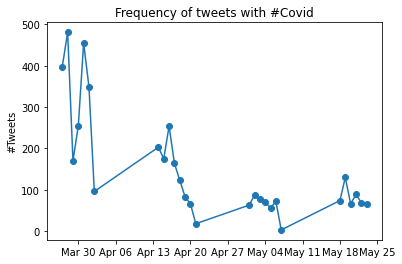

In [207]:

fig, ax = plt.subplots()
ax.plot(x, marker='o', linestyle='-')
ax.set_ylabel('#Tweets')
ax.set_title('Frequency of tweets with #Covid')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [322]:
def plot_frequency_of_tweets(hashtag: str, df: pd.DataFrame(), save= False, filename=None):
    temp = df[df.hashtag == hashtag]
    temp = temp.groupby(['date_datetime']).size()
    fig, ax = plt.subplots()
    ax.plot(temp, marker='o', linestyle='-')
    ax.set_ylabel('#Tweets')
    ax.set_title(f'Frequency of tweets with #{hashtag}')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
    if save:
        if filename is not None:
            plt.savefig(filename)
        else:
            filepath='customPlots\\hashtags\\'+hashtag
            plt.savefig(filepath)
    return fig

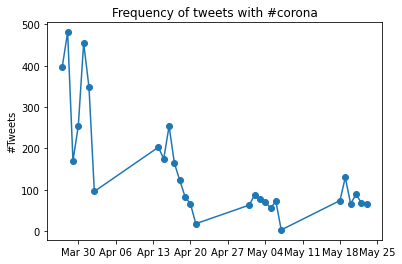

In [323]:
fig = plot_frequency_of_tweets(hashtag='corona', df=time_df, save=True, filename='customPlots\\hashtags\\corona')

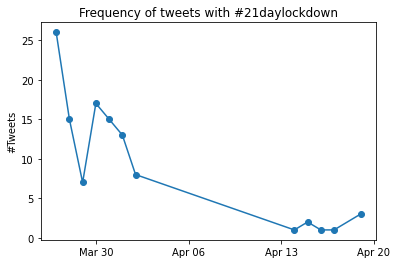

In [324]:
fig = plot_frequency_of_tweets(hashtag='21daylockdown', df=time_df, save=True)

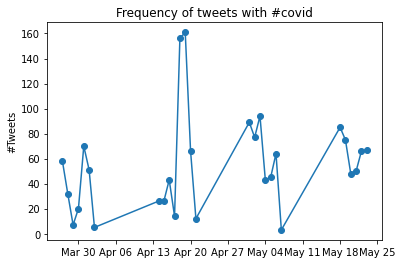

In [327]:
fig = plot_frequency_of_tweets(hashtag='covid', df=time_df, save=True)

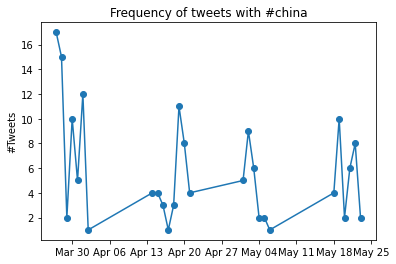

In [328]:
fig = plot_frequency_of_tweets(hashtag='china', df=time_df, save=True)

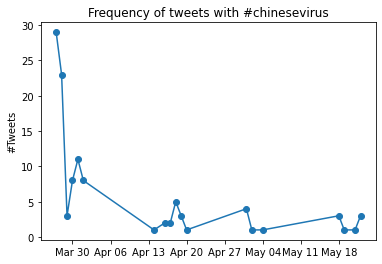

In [329]:
fig = plot_frequency_of_tweets(hashtag='chinesevirus', df=time_df, save=True)

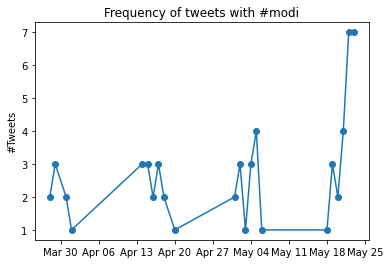

In [330]:
fig = plot_frequency_of_tweets(hashtag='modi', df=time_df, save=True)

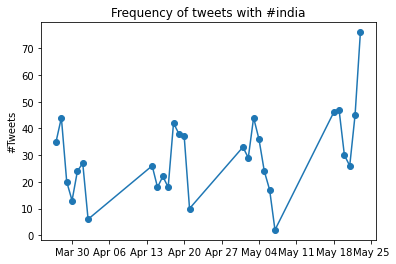

In [331]:
fig = plot_frequency_of_tweets(hashtag='india', df=time_df, save=True)

In [216]:
def plot_multiple_frequencies(hashtags: List[str], df: pd.DataFrame()):
    data = []
    print("Length is " + str(len(hashtags)))
    fig, axs = plt.subplots(len(hashtags))
    for hashtag in hashtags:
        print("hashtag")
        temp = df[df.hashtag == hashtag]
        temp = temp.groupby(['date_datetime']).size()
        data.append(temp)
    ite = 0
    for item in data:
        axs[ite].plot(item, marker='o', linestyle='-')
        ite += 1
    ax.set_ylabel('#Tweets')
    ax.set_title(f'Frequency of tweets with multiple hashtags')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
    return fig

In [217]:
# plot_multiple_frequencies(hashtags=["corona", "covid"], df=time_df)

In [218]:
x = get_hashtag_data('corona', time_df)
x = x.groupby(['date_datetime']).size()
x

date_datetime
2020-03-27    398
2020-03-28    481
2020-03-29    170
2020-03-30    255
2020-03-31    455
2020-04-01    348
2020-04-02     96
2020-04-14    203
2020-04-15    175
2020-04-16    254
2020-04-17    164
2020-04-18    123
2020-04-19     83
2020-04-20     66
2020-04-21     18
2020-05-01     63
2020-05-02     87
2020-05-03     78
2020-05-04     71
2020-05-05     56
2020-05-06     72
2020-05-07      3
2020-05-18     74
2020-05-19    130
2020-05-20     66
2020-05-21     89
2020-05-22     69
2020-05-23     66
dtype: int64

In [219]:
def get_date_data(date: str , df: pd.DataFrame(), column_name: str):
    try:
        temp_df = df[df[column_name] == datetime.datetime.strptime(date, '%Y-%m-%d')]
    except:
        temp_df = df[df[column_name] == date]
    return temp_df

In [220]:
get_date_data(date='2020-05-02', df=time_df, column_name='date_datetime')

,date_datetime,hashtag,time_datetime
28745,2020-05-02,covid_19,00:06:58
28745,2020-05-02,coronavirus,00:06:58
28745,2020-05-02,lockdownindia,00:06:58
28745,2020-05-02,lockdownextended,00:06:58
28748,2020-05-02,coronavirus,00:08:17
...,...,...,...
31025,2020-05-02,freesafoorazargar,23:44:46
31025,2020-05-02,islamophobia,23:44:46
31026,2020-05-02,coronavirus,23:45:02
31026,2020-05-02,covid__19,23:45:02


In [221]:
print(type(split_df.iloc[1].date))
split_df

<class 'str'>


,time,hashtags,date
4,04:01:59,[indiafightscorona],2020-03-27
5,04:02:20,[serveinmylanguage],2020-03-27
6,04:02:50,"[bangalorepolice, bangalorelockdown]",2020-03-27
7,04:02:53,"[coronavirus, covid2019, coronapandemie, coron...",2020-03-27
10,04:03:44,"[chinesevirus19, sarcasmalert]",2020-03-27
...,...,...,...
54024,17:09:28,[aatmanirbharapnabharat],2020-05-23
54025,17:09:39,[pmcaresfund],2020-05-23
54026,17:10:17,[aatmanirbharapnabharat],2020-05-23
54027,17:10:21,"[eidmubarak, eidalfitr, romanreigns]",2020-05-23


In [194]:
get_date_data(date='2020-05-02', df=split_df, column_name='date')

,time,hashtags,date


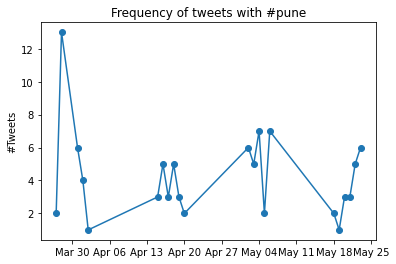

In [197]:
fig = plot_frequency_of_tweets(hashtag='pune', df=time_df)

In [199]:
split_time_df = pd.DataFrame(columns={'date', 'hashtags'})
split_time_df['hashtags'] = split_df['hashtags']
split_time_df['date'] = pd.to_datetime(split_df['date'])

In [222]:
get_date_data(date='2020-05-02', df=split_time_df, column_name='date')

,hashtags,date
28745,"[covid_19, coronavirus, lockdownindia, lockdow...",2020-05-02
28748,"[coronavirus, covid19]",2020-05-02
28750,"[coronavirus, covid19]",2020-05-02
28751,"[fertilizer, covid, covidー19, covid_19, trumpi...",2020-05-02
28752,[caa_nrc_npr],2020-05-02
...,...,...
31022,[stoptargetingmuslim],2020-05-02
31023,"[weekenddoneright, psm, scrum, scrummaster, ac...",2020-05-02
31025,"[caa_nrc_protests, jamiamilliaislamia, freesaf...",2020-05-02
31026,"[coronavirus, covid__19]",2020-05-02


In [223]:
split_time_df.shape

(22528, 2)

In [233]:
split_time_df.date.value_counts()

2020-05-18    1350
2020-03-28    1204
2020-03-31    1191
2020-05-03    1149
2020-05-19    1147
2020-05-22    1134
2020-05-04    1088
2020-05-23    1039
2020-04-18     980
2020-04-01     922
2020-05-21     910
2020-03-27     893
2020-05-02     881
2020-05-05     875
2020-04-19     839
2020-05-01     806
2020-04-20     786
2020-05-06     775
2020-05-20     684
2020-04-16     669
2020-04-14     610
2020-03-30     575
2020-03-29     522
2020-04-15     485
2020-04-17     436
2020-04-02     333
2020-04-21     163
2020-05-07      82
Name: date, dtype: int64

In [332]:
def plot_frequency_of_tweets_per_day(df: pd.DataFrame(), filename: None, save: bool = False,kind: str = 'line'):
    temp = None
    try:
        series = df['date_datetime']
    except:
        series = df['date']
    if kind == 'scatter':
        temp = pd.DataFrame()
        temp['date'] = series
        temp['frequency'] = series.value_counts().transform('count')
        return temp
    series = series.value_counts()
    fig = series.plot(kind=kind, title='#tweets per day (related to covid)')
    if save:
        plt.savefig(fname=filename)
    return temp

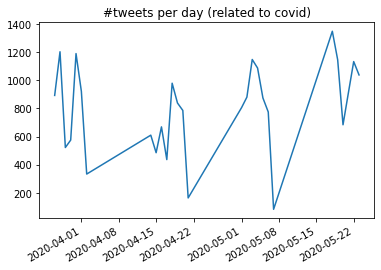

In [333]:
temp = plot_frequency_of_tweets_per_day(df=split_time_df, kind='line', save = True, filename='customPlots\\tweetsPerDay\\line')

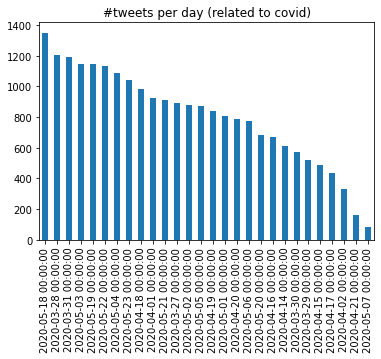

In [334]:
temp = plot_frequency_of_tweets_per_day(split_time_df, kind='bar', save = True, filename='customPlots\\tweetsPerDay\\bar')

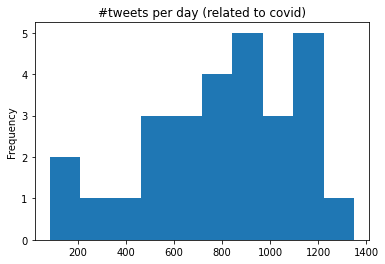

In [335]:
temp = plot_frequency_of_tweets_per_day(split_time_df, kind='hist', save = True, filename='customPlots\\tweetsPerDay\\hist')

In [294]:
# temp = plot_frequency_of_tweets_per_day(split_time_df, kind='scatter')
# temp

In [337]:
len(all_hashtags)

74704

In [339]:
type(split_df_explode['hashtags'].value_counts())

pandas.core.series.Series

In [349]:
string_hashtags_value_counts = split_df_explode['hashtags'].value_counts().to_string()

In [350]:
len(string_hashtags_value_counts)

1318935

In [351]:
file = open('cleanDatasets\\observation.txt', 'w+')
string_hashtags_value_counts = string_hashtags_value_counts.encode().decode('utf-8')
file.write(string_hashtags_value_counts)
file.close()

UnicodeEncodeError: 'charmap' codec can't encode character '\u30fc' in position 415: character maps to <undefined>

In [352]:
split_df_explode['hashtags'].value_counts().to_csv(path_or_buf='cleanDatasets\\hashtags_value_counts.csv')